https://catalog.data.gov/dataset/animal-care-and-control-adopted-animals-50bd9

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn import neighbors, linear_model
from scipy import *
%matplotlib inline

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dfcorr = df.corr()

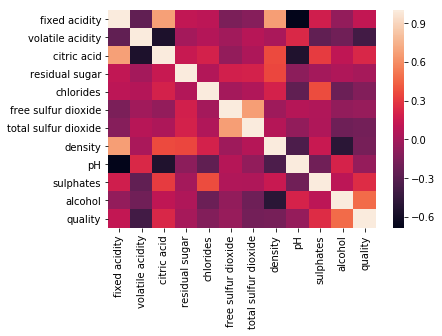

In [6]:
sns.heatmap(dfcorr)

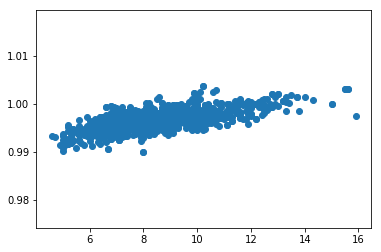

In [7]:
plt.scatter(x=df['fixed acidity'], y=df['density'])

In [8]:
features = pd.DataFrame(data=df['density'])

In [9]:
features['fixedacidity'] = df['fixed acidity']

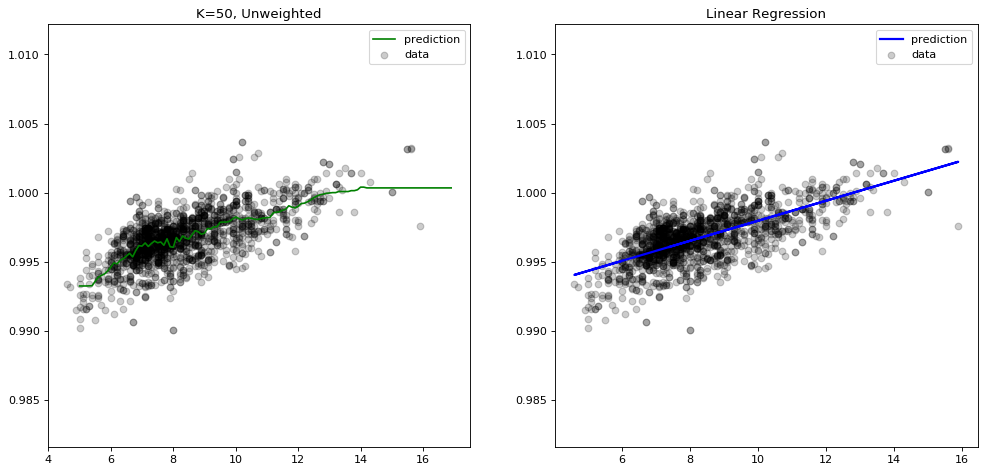

Linear Regression:

Coefficient: 
 [0.00072416]

Intercept: 
 0.9907219496290315

R-squared:
0.4462871845074949

KNN Regression:

Accuracy: 0.17 (+/- 0.44)


In [15]:
X = pd.DataFrame(features.fixedacidity)
Y = features.density

#Build Knn
knn = neighbors.KNeighborsRegressor(n_neighbors=50)
knn.fit(X,Y)
T = np.arange(5, 17, 0.1)[:, np.newaxis]
Y_ = knn.predict(T)

#Build Linear Regression
regr = linear_model.LinearRegression()
regr.fit(X,Y)

plt.figure(figsize=(15, 7), dpi=80)

plt.subplot(1,2,1)
plt.scatter(X,Y, c='k', label='data', alpha=.2)
plt.plot(T,Y_, c='g', label='prediction')
plt.legend()
plt.title('K=50, Unweighted')

plt.subplot(1,2,2) 
plt.scatter(X,Y, c='k', label='data', alpha=.2)
plt.plot(X, regr.predict(X), color='blue', linewidth=2, label='prediction')
plt.legend()
plt.title('Linear Regression')
plt.show()

print('Linear Regression:')
print('\nCoefficient: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))



from sklearn.model_selection import cross_val_score
print('\nKNN Regression:\n')
score = cross_val_score(knn, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


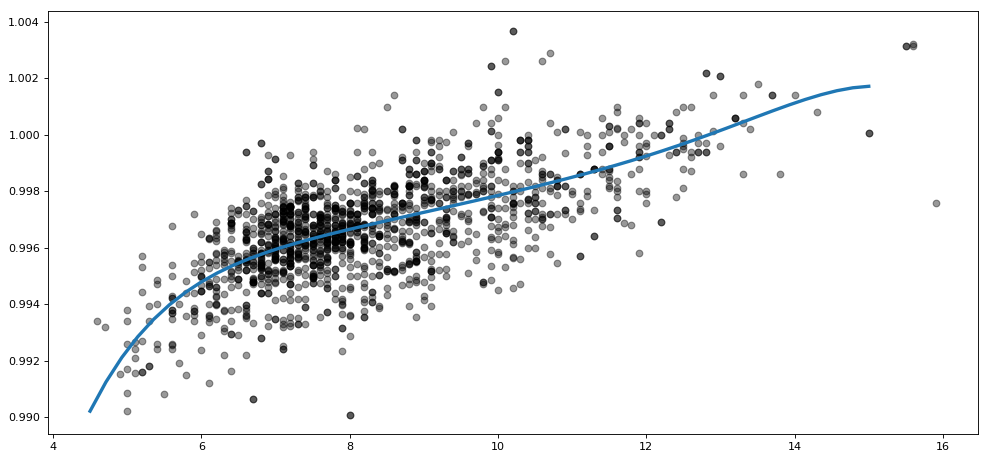

In [18]:

x = features.fixedacidity
y = features.density


plt.figure(figsize=(15, 7), dpi=80)

p = np.poly1d(np.polyfit(x,y,6))

t = np.linspace(4.5,15)

plt.plot(x,y,'o',color='k',alpha=.4)
plt.plot(t,p(t),'-',lw=3)



plt.show()

In [12]:
p.c
print('\nCoefficient: \n', p.c)


Coefficient: 
 [-1.02335272e-07  7.02493912e-06 -2.01842993e-04  3.13982435e-03
 -2.84754605e-02  1.49952020e-01 -4.21419378e-01  1.47682226e+00]


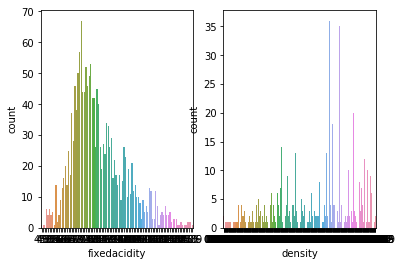

In [13]:
plt.subplot(1,2,1)
sns.countplot(x)
plt.subplot(1,2,2)
sns.countplot(y)